# K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

## Import Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.

In [36]:
df = pd.read_csv("Classified Data",index_col=0)

In [37]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale. That is why while using KNN we standardize everything on a standard scale.

In [38]:
from sklearn.preprocessing import StandardScaler # It will look a lot like as if it was a ML model.

In [39]:
scaler = StandardScaler() # Create an instance of StandardScale as we would for some ML algorithm.

In [40]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
# As we want to fit this to our training data and not the actual TARGET CLASS that's why drop for that.

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
# Transform method performs the standardization by centering and scaling.
# Gives us a scaled version of values in df excluding TARGET CLASS

In [43]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1]) # Creating a feature DataFrame
# Passing in our scaled_features array as data and for column names we specify df.columns but the last TARGET CLASS so [:-1]
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = scaled_features
Y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30,random_state = 101)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.
And then we will move on towards using Elbow Method to choose the ideal K value.

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier(n_neighbors=1)
# By specifying n_neighbors it means number of neighbors we want for this model. we set it as 1 for this time.

In [53]:
knn.fit(X_train,y_train) # Fitting on our training data.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [62]:
pred = knn.predict(X_test)
pred# Shows to which class a particular prediction belongs to.

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], d

## Predictions and Evaluation

Let's Evaluate KNN model! After this we do elbow method to find out an optimal k value.

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
print(confusion_matrix(y_test,pred))

[[151   8]
 [ 15 126]]


In [60]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



So far model looks good with an accuracy of TP+TN/Total = (151+126)/300 = 0.92.
- Let's see if we can even further improve the model.

## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [64]:
error_rate = [] # First we set error_rate as an empty list. Then we iterate on many models using different k value.
# And we plot out the error rate and see which one has the lowest error rate.

# Will take some time
for i in range(1,40): # Check every k value from 1 to 40 for all of those values we will call KNeighborsClassifier, with
    # n_neighbors = i, then we fit that model, then we say pred_i off of test set and then to error_rate we append
    # mean of pred_i != y_test. AKA Average error rate being added to error_rate list for every iteration from 1 to 40.
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

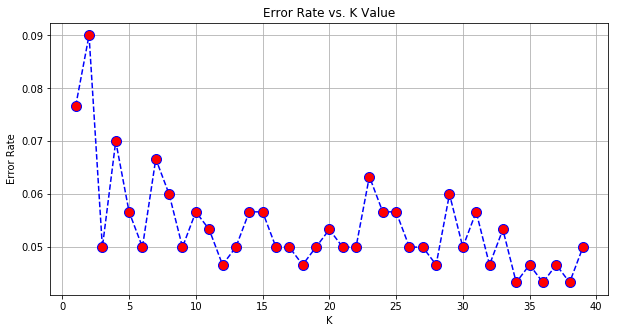

In [68]:
plt.figure(figsize=(10,5)) # A little larger than usual for better understanding purpose.
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10) # Plot of range(1,40) vs error_rate
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)

- We notice that we start with error of around 0.075 and it went up for k = 2 and then it went drastically down for k=3 and so on.

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [21]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[135  11]
 [ 21 133]]


              precision    recall  f1-score   support

           0       0.87      0.92      0.89       146
           1       0.92      0.86      0.89       154

   micro avg       0.89      0.89      0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300



In [70]:
# NOW WITH K=17
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[153   6]
 [  9 132]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

   micro avg       0.95      0.95      0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [22]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[133  13]
 [ 11 143]]


              precision    recall  f1-score   support

           0       0.92      0.91      0.92       146
           1       0.92      0.93      0.92       154

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



# Great job!

We were able to squeeze some more performance out of our model by tuning to a better K value!